In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

## Twitter

In [3]:
from konlpy.tag import Twitter

In [4]:
twitter = Twitter()


C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### stickword한 거 가져오기

In [279]:
mag_ch = pd.read_csv('./magazine/final/magazine_ch_stickword.csv', sep='|', encoding ='utf-8')

### stop_words 추가

In [280]:
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 

In [281]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [282]:
sw_df.columns = ['stopword']

In [283]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [284]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [285]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [286]:
add_0 = ['있', '위하', '가격미정', '미정', '가격', '지나', '선보이', '이번', '특히', '통하', '역시', '때문', '않', '알리', 
         '주목', '대하', '한편', '사실', '당시', '그것', '지금', '사람' ]
for w in add_0:
    stop_words.append(w)

In [287]:
add_1 = ['위하', '선보이', '가격', '가격 미정', '미정', '지금', 'BY', 'N', '있', '없', '지나', '만들', '말하', '입', '보', 
         '되','선보이', '같', '대하', '등장', 'n', 'nn']
for w in add_1:
    stop_words.append(w)

In [288]:
add_2 = ["가격", "가격미정", "같", "그것", "당시", "대하", "더", "되", "등장", "때문", "만들", "말하", "미정", "보",
"사람", "사실", "선보이", "않", "알리", "없", "역시", "위하", "이번", "입", "있", "주목", "지금", "지나", "통하", "특히",
"한편", "BY", "N", "NN", "수", "은", "위", "말", "대", "전", "듯", "중", "최근", "보여주", "후"]
for w in add_2:
    stop_words.append(w)

In [289]:
add_top200 = ['있는', '소재', '가장', '지난', '같은', '위해', '모든', '통해', '개', '드', 'DIOR', '생각', '내', '건', '두', 
              '구찌', '대한', '가지', '속', '곳', 'VIARD', 'LAGERFELD',
             '가장', '지난', '같은', '복', '버버리', '위해', 'LVMH', '내', '두', '통해', '대한', '건', '속', '모든', '패션계',
              '스', '구찌', '드', '그룹', '발렌시아', '눈', '세', 'LAURENT', 'SAINT', 'DIOR', '지방시', '바이',
              '안', '티', '재', '데', '가지', '있는', 'SLIMANE', 'PHILO', '시작','제품', '완성', '착용', '사용']
for w in add_top200:
    stop_words.append(w)

In [290]:
add_3 = ['많은', '이자', '없는', '순간', '아니라', '자리', '있었다', '이름', '세', '움', '링', '대해']
for w in add_3:
    stop_words.append(w)

In [291]:
add_4 = ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대', 'J', '점', '약', '프라다', '현재', '진행', 
         '도', '알', '날', '걸', '앞', '채', '톱', '선택', '정도', '방식', '제작','새로운', '촬영', '활동', '뒤', '거', '볼' , 
         '↑', '손', '에르메스', '번', '르', '룩', '그녀', 'CREDIT', 'SHARE', 'KEYWORD', 'BYBAZARR', '바자','BYBAZAAR',
        '대표', '라인', '표현', '리얼', '활용', '형태', '발표', '트', '비통', '부', '트', '사이', '동시',
        '마지막', '지난해', '느낌', '탄생', '뷰티', '연상', '입니다', '기자', '더욱', '보이']
for w in add_4:
    stop_words.append(w)

In [292]:
stop_words[-10:]

['마지막', '지난해', '느낌', '탄생', '뷰티', '연상', '입니다', '기자', '더욱', '보이']

In [293]:
len(stop_words)

908

### 1. 'Adjective': '형용사', 'Determiner': '관형사', 'Foreign': '외국어, 한자 및 기타기호', 'Alpha': '알파벳', 'Noun': '명사' 품사만 선별해 리스트에 담기

In [294]:
# ADFN_word_list= []
# for sentence1 in sentences_tag:
#     for word, tag in sentence1:
#         if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha']:
#             if word not in stop_words:
#                 ADFN_word_list.append(word)

In [295]:
# len(ADFN_word_list)

In [296]:
# ADFN_list= []
# for sentence1 in sentences_tag:
#     words = []
#     for word, tag in sentence1:
#         if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha']:
#             if word not in stop_words:
#                 words.append(word)
#     ADFN_list.append(words)

In [297]:
# len(ADFN_list)

In [298]:
# ch_dwr['ADFN'] = ADFN_list

In [299]:
# ADFN_df = pd.DataFrame({
#     'article':article_list,
#     'noun':ADFN_list
# })

In [300]:
# ADFN_word_list[-10:]

In [301]:
for i in r

SyntaxError: invalid syntax (<ipython-input-301-5e1f684c562f>, line 1)

In [302]:
for word in mag_ch['ADFN']:
    if "부" in word:
        print(word)
        print('-'*50)

['인스타그램', '에디터', '디자이너', '인', '플루', '계정', '막', '시작', '가을', '겨울', '상품', '족', '가방', '액세서리', '심심', '치', '콘텐츠', '플랫폼', '앞', '빈티지', 스타일링, '아아', '한정판', '모델', '어쩌면', '패션계', '인물', '일지', '개인', '반가', '움', '옷', '액세서리', '아름답다', '처음', '함', '납작해진', 'CHANEL', '클래식', '백', '대해', '낡은', '백인', '보기', '한창때', '한결', '너그럽고', '우아해진', '여사', '보이', '데님', '팬츠', '스웨터', '평범한', '룩', '우아함', '방울', '드라마', '하이에나', '변호사', '역', '김혜수', '빈티지', '가방', '여럿', '처음', '빳빳함', '중력', '느슨하게', '에르메스', '에르', 'CHANEL', '브리프케이스', '소품', '경력', '능력', '정금', '역할', '리얼리티', '부여', '만', '처', '박아', '박스', '루이', '비통', '팩', '몽수리', '귀여운', '이름', '팩', '포코', '노', '프라다', '팩', '후계', '팩', '한쪽', '압구정동', '팩', '여성', '대여섯', '명', '만날', '있었다', '만에', '세상', '빛', '팩', '얼룩덜룩하긴', '튼튼했다', '스웨터', '팩', '팩', '이제', '빈티지', '몽', '수리', '팩', 'CHANEL', '가브리엘', '팩', '귀하다', '디자인', '변형', '기존', '디자인', '어느덧', '레어템', '있었다', '빈티지', '어쩌면', '좋고', '좋은', '일이', '사랑', '사랑', '물건', '새로운', '사랑', '좋은', '일이', '요즘', '빈티지', '물건', '대해', '중고', '임', '뜻', 'USED', '소장', 'PRE', 'OWNED', '사용', '거나', 'PRE', 

In [303]:
mag_ch['ADFN_2'] = mag_ch['ADFN'].str.replace("'칼', '리버'", "칼리버")

In [304]:
mag_ch['ADFN_2'] = mag_ch['ADFN'].str.replace("'칼'", "KARL")

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [305]:
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [306]:
mag_ch['ADFN'][0][0]

'메탈'

In [307]:
ADFN_word_list = []
for i in range(len(mag_ch)):
    for word in mag_ch.loc[i, 'ADFN']:
        if word not in stop_words:
            ADFN_word_list.append(word)

In [308]:
count = Counter(ADFN_word_list)
print(count.most_common(100))

[('CHANEL', 5469), ('브랜드', 921), ('KARL', 882), ('쇼', 735), ('모델', 716), ('장식', 702), ('백', 665), ('드레스', 634), ('파리', 531), ('여성', 508), ('스타일', 495), ('트위드', 488), ('컬러', 482), ('디자이너', 454), ('블랙', 441), ('COUTURE', 440), ('재킷', 428), ('디자인', 426), ('주얼리', 409), ('코코', 403), ('하우스', 370), ('아이템', 364), ('세계', 354), ('화이트', 350), ('GABRIELLE', 344), ('공방', 339), ('옷', 318), ('럭셔리', 310), ('다양한', 308), ('크루즈', 306), ('VIRGINIE', 293), ('영감', 290), ('영화', 281), ('디렉터', 274), ('프랑스', 268), ('매력', 261), ('슈즈', 255), ('스커트', 254), ('골드', 253), ('가죽', 241), ('팬츠', 240), ('HAUTE', 240), ('패션쇼', 234), ('가방', 231), ('슈트', 230), ('런웨이', 225), ('클래식', 223), ('여름', 220), ('워치', 215), ('코트', 211), ('부츠', 209), ('팔레', 207), ('봄', 206), ('사랑', 203), ('로고', 198), ('향수', 194), ('크리에이티브', 191), ('핑크', 190), ('가을', 185), ('의상', 185), ('무대', 183), ('패턴', 182), ('겨울', 181), ('데님', 172), ('상징', 171), ('퍼렐', 169), ('다이아몬드', 167), ('책', 166), ('체인', 165), ('배우', 165), ('캠페인', 163), ('실루엣', 162), ('뉴욕', 162)

In [309]:
before = mag_ch[(mag_ch['date'].str[:4]).astype(int) <2018]
after = mag_ch[(mag_ch['date'].str[:4]).astype(int) >=2018]

before.reset_index(drop = True, inplace = True)
after.reset_index(drop = True, inplace = True)

print('before', len(before))
print('after', len(after))

before 395
after 1055


In [310]:
common = [ '모델', '백', '브랜드',  'KARL', '쇼' ,'파리', '디자인', '디자이너', 'COUTURE', '세계', '장식', '드레스', '여성', 
         'GABRIELLE', '가브리엘', 'VIRGINIE', '코코', '봄', '여름', '가을', '겨울', '광고']

In [311]:
before_word_list = []
for i in range(len(before)):
    for word in before.loc[i, 'ADFN']:
        if word not in stop_words:
            if word not in common:
                before_word_list.append(word)

In [312]:
after_word_list = []
for i in range(len(after)):
    for word in after.loc[i, 'ADFN']:
        if word not in stop_words:
            if word not in common:
                after_word_list.append(word)

In [313]:
before_count = Counter(before_word_list)
print(before_count.most_common(100))
print('-'*50)
after_count = Counter(after_word_list)
print(after_count.most_common(100))

[('CHANEL', 1343), ('스타일', 154), ('주얼리', 127), ('트위드', 103), ('블랙', 98), ('컬러', 97), ('영화', 97), ('재킷', 88), ('향수', 88), ('슈즈', 87), ('옷', 85), ('전시', 84), ('코트', 81), ('아이템', 81), ('영감', 78), ('화이트', 75), ('다이아몬드', 75), ('다양한', 72), ('하우스', 71), ('슈트', 71), ('골드', 67), ('가죽', 67), ('매력', 64), ('럭셔리', 64), ('HAUTE', 63), ('프랑스', 63), ('부츠', 62), ('팬츠', 61), ('코드', 59), ('하이', 57), ('무대', 56), ('향', 55), ('핑크', 54), ('패턴', 53), ('밀', 53), ('상징', 52), ('크루즈', 52), ('호텔', 52), ('진주', 51), ('배우', 50), ('의상', 49), ('캠페인', 49), ('스커트', 48), ('로고', 47), ('패션쇼', 46), ('분위기', 45), ('여자', 45), ('체인', 44), ('팔레', 44), ('남성', 44), ('공방', 44), ('가방', 43), ('디렉터', 43), ('사랑', 43), ('클래식', 43), ('스타', 42), ('서울', 42), ('런웨이', 42), ('모티프', 42), ('행사', 41), ('주인공', 41), ('티셔츠', 40), ('참석', 40), ('한국', 40), ('목걸이', 39), ('시계', 39), ('콜레트', 39), ('데님', 38), ('크리에이티브', 38), ('미국', 38), ('뮤즈', 37), ('고대', 37), ('그리스', 37), ('지드래곤', 37), ('카라', 37), ('이미지', 36), ('프리', 36), ('메탈', 36), ('매장', 36), ('워치', 35

In [314]:
before_rank = before_count.most_common(500)
after_rank = after_count.most_common(500)

In [41]:
# 한 글자인 단어는 제외

# for i, v in enumerate(ADFN_word_list):
#     if len(v)<2:
#         ADFN_list.pop(i)

In [ ]:
ADFN_rank = count.most_common(500)
# for v in word_list:
#     print(v)
ADFN_rank

### 명사빈도 카운트

## 워드클라우드 만들기

In [48]:
import matplotlib.pyplot as plt

### 패키지 및 폰트 설치

In [49]:
import matplotlib.font_manager as fm

# # 이용 가능한 폰트 중 '고딕'만 선별
# for font in fm.fontManager.ttflist:
#     if 'Gothic' in font.name:
#         print(font.name, font.fname)

In [50]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [51]:
from wordcloud import WordCloud

In [52]:
wc = WordCloud(font_path=font_path, background_color= '#272727', width=600, height=400, colormap = 'BuPu')

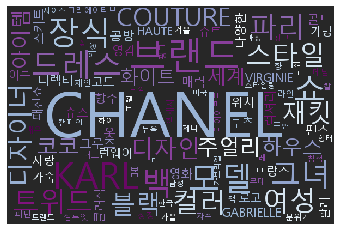

In [40]:
wc.generate_from_frequencies(dict(ADFN_rank[:100]))

plt.imshow(wc) 
plt.axis('off') 

# plt.savefig('./final_img/rose_total50.png', bbox_inches = 'tight')
plt.show()


wc.to_file('./final_img/chanel_total100.png')

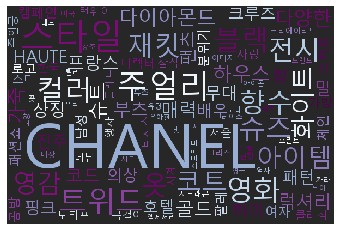

In [317]:
wc.generate_from_frequencies(dict(before_rank[:100]))

plt.imshow(wc) 
plt.axis('off') 

# plt.savefig('./final_img/rose_total50.png', bbox_inches = 'tight')
plt.show()


wc.to_file('./final_img/chanel_before_total100.png')

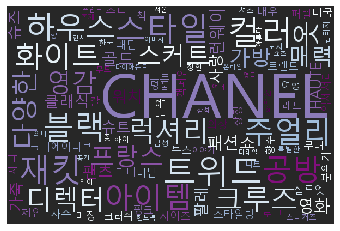

In [316]:
wc.generate_from_frequencies(dict(after_rank[:100]))

plt.imshow(wc) 
plt.axis('off') 

# plt.savefig('./final_img/rose_total50.png', bbox_inches = 'tight')
plt.show()


wc.to_file('./final_img/chanel_after_total100.png')



### rank 보기

In [464]:
ch_ADFN_rank_df = pd.DataFrame(ADFN_rank)

In [465]:
ch_ADFN_rank_df.columns = ['word', 'count']

In [466]:
ch_ADFN_rank_df.loc[100:150]

,word,count
100,꽃,131
101,셔츠,130
102,서울,130
103,여행,128
104,연상,128
105,이야기,126
106,마지막,126
107,화려한,126
108,모자,125
109,이미지,125


In [468]:
ch_ADFN_rank_df.to_csv('./magazine/final/ch_ADFN_rank_dropword.csv', sep='|', encoding='utf-8', index = False)

In [318]:
ch_before_rank_df = pd.DataFrame(before_rank)
ch_after_rank_df = pd.DataFrame(after_rank)

In [319]:
ch_before_rank_df.columns = ['word', 'count']
ch_after_rank_df.columns = ['word', 'count']

In [325]:
ch_after_rank_df[40:60]

,word,count
40,핑크,136
41,의상,136
42,스타일링,135
43,데님,134
44,책,134
45,실루엣,132
46,사이즈,131
47,뉴욕,131
48,코트,130
49,패턴,129


In [207]:
ch_before_rank_df.to_csv('./ch_before_rank_df.csv', sep='|', encoding = 'utf-8', index = False)
ch_after_rank_df.to_csv('./ch_after_rank_df.csv', sep='|', encoding = 'utf-8', index = False)

In [188]:
before.to_csv('./ch_before.csv', sep='|', encoding = 'utf-8', index = False)
after.to_csv('./ch_after.csv', sep='|', encoding = 'utf-8', index = False)

### 아이템리스트

In [78]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱', 
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들', 
 '귀고리', '워치', '코트', '부츠']

In [79]:
# 패션용어 stopwords
sw = ['디자이너', '쇼', '브랜드', '스타일', '디자인', '장식', '옷', '디자인', '디렉터', '모델']

In [80]:
ch_dwr.to_csv('./magazine/final/magazine_ch.csv', sep='|', encoding = 'utf-8', index = False)

NameError: name 'ch_dwr' is not defined

In [ ]:
### 확인하기

In [143]:
for i in range(len(ADFN_df)):
    if '두' in ADFN_df.loc[i, 'noun']:
        print(i)

1
37
53
74
91
104
116
135
147
174
180
195
203
224
228
229
236
238
239
251
252
253
256
260
263
267
276
278
281
282
286
288
293
294
295
297
300
306
307
310
318
319
320
322
324
325
326
328
333
336
344
347
362
382
412
414
423
458
473
477
479
487
507
523
525
528
533
534
537
543
546
551
563
571
602
603
620
626
633
635
636
651
664
666
670
682
684
695
710
712
713
721
764
766
775
785
796
805
811
813
836
841
850
853
880
906
912
916
922
923
935
936
949
957
962
966
977
980
993
997
998
1002
1010
1019
1032
1033
1035
1038
1042
1044
1053
1057
1058
1061
1069
1071
1080
1081
1097
1098
1106
1114
1119
1124
1125
1129
1137
1148
1150
1152
1154
1164
1199
1215
1218
1219
1234
1249
1266
1270
1281
1292
1297
1302
1306
1313
1324
1342
1360
1371
1378
1380
1381
1400
1406
1416
1436
1439
1445
1447


In [146]:
ADFN_df.loc[477, 'noun']

['↑',
 '사진',
 '봄',
 '여름',
 'CHANEL',
 'HAUTE',
 'COUTURE',
 '컬렉션',
 '현지',
 '가을',
 '겨울',
 'HAUTE',
 'COUTURE',
 '컬렉션',
 'CHANEL',
 '스키아파렐리',
 '세기',
 '대결',
 '예고',
 '가운데',
 '몇몇',
 '주목할만한',
 '꾸띄르',
 '데뷔',
 '작',
 '기존',
 '레디',
 '투',
 '웨어',
 '컬렉션',
 '없는',
 '컨셉',
 '추얼',
 '패션쇼',
 'CHANEL',
 '스키아파렐리',
 '브랜드',
 '역사',
 '코코',
 'CHANEL',
 '엘사',
 '스키아파렐리',
 '전성기',
 '구가',
 '대에는',
 '서로',
 '라이벌',
 '구도',
 '그러한',
 '이유',
 '꾸띠르',
 'CHANEL',
 '스키아파렐리',
 '세기',
 '계속',
 '라이벌',
 '전이',
 '최대',
 '이슐',
 '↑',
 '사진',
 '봄',
 '여름',
 '스키아파렐리',
 'HAUTE',
 'COUTURE',
 '컬렉션',
 'CHANEL',
 'KARL',
 'LAGERFELD',
 'VIRGINIE',
 'VIARD',
 '데뷔',
 '무대',
 '스키',
 '아파',
 '펠리',
 '새로',
 '텍사스',
 '출신',
 '다니엘',
 '베리',
 '꾸띄르',
 '데뷔전',
 '공통점',
 '가지',
 '먼저',
 '현지',
 '월요일',
 '아침',
 '스키아파렐리',
 '크리에이티브',
 '디렉터',
 '다니엘',
 '베리',
 '데뷔',
 '쇼',
 '다니엘',
 '베리',
 '뉴욕',
 '컨셉',
 '추얼',
 '디자이너',
 '톰',
 '브라운',
 '여성',
 '남성',
 '컬렉션',
 '수장',
 '↑',
 '사진',
 'CHANEL',
 '크리에이티브',
 '디렉터',
 'VIRGINIE',
 'VIARD',
 '좌',
 '스키아파렐리',
 '크리에이티브',
 '디렉터',
 '다니엘',
 '베리',
 '기성

In [142]:
ch_dwr.loc[819, 'link']

'http://www.marieclairekorea.com/fashion/2020/03/%ec%83%a4%eb%84%ac-%ec%98%a4%ed%8a%b8-%ec%bf%a0%ed%8a%80%eb%a5%b4-2020-s-s-%eb%b2%a0%ec%8a%a4%ed%8a%b8-%eb%aa%a8%eb%a8%bc%ed%8a%b8/'

In [ ]:
## 사전에 등록했으면 하는 단어
['레디 투 웨어', '공방', '트위드', 'FW', 'F/W', 'SS', 'S/S', '오간자', '아름다움', '그랑 팔레', '캐주얼', '런웨이', 
 '오프숄더', '레이어드', '']